In [51]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')


In [52]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [54]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

**cleaning the data**

In [55]:
df.drop(columns =  ['Product_Category_2', 'Product_Category_3'], inplace= True)

**Unique values in each column**

In [56]:
for col in df.columns:
    print(col,":",df[col].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


**average number of products purchases**

In [57]:
len(df['User_ID']) // df['User_ID'].nunique()

91

**Average Amount spent by Users**

In [58]:
round(df['Purchase'].sum() / df['User_ID'].nunique(), ndigits= 2)

851751.55

<Axes: title={'center': 'Distribution of genders'}, ylabel='Gender'>

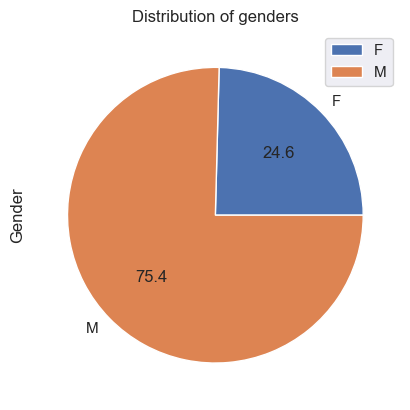

In [59]:
gender_df = df.groupby('Gender').agg({'Gender':'count'})
gender_df.plot(kind= 'pie', y= 'Gender', autopct= "%.1f", title= 'Distribution of genders')

**Total money spent by each gender**

<Axes: xlabel='Gender', ylabel='Purchase'>

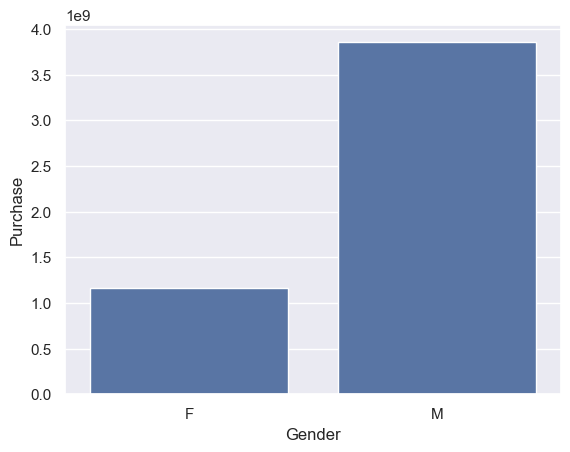

In [60]:
money_df = df.groupby('Gender').agg({'Purchase': 'sum'})
sns.barplot(data= money_df, y = 'Purchase', x= 'Gender')

**Money spent on average by each gender**

C:\Users\user\AppData\Local\Temp\ipykernel_14720\260848459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= avg_money, y = 'Purchase', x= 'Gender', palette= 'bright')


<Axes: xlabel='Gender', ylabel='Purchase'>

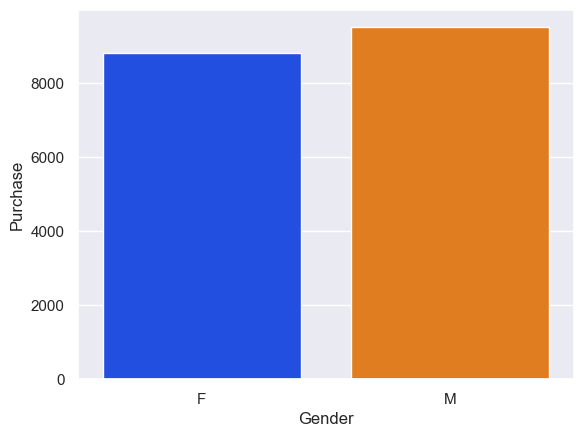

In [61]:
avg_money = df.groupby('Gender').agg({'Purchase': 'mean'})
sns.barplot(data= avg_money, y = 'Purchase', x= 'Gender', palette= 'bright')

**Distribution of Age**

<Axes: xlabel='count'>

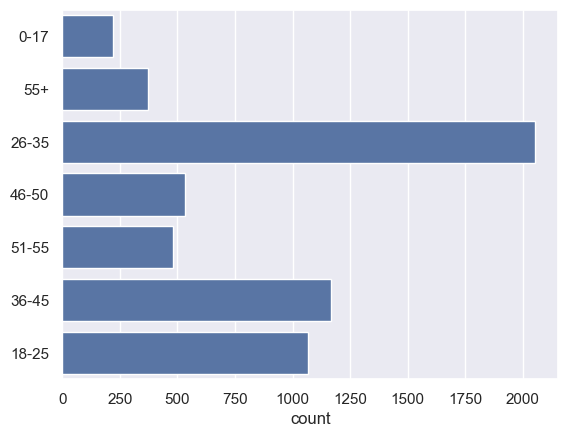

In [62]:
# sns.countplot(data= df, x= 'Age', palette= 'Set2', legend= False)
age_lst = []
for user in df['User_ID'].unique():
    age_lst.append(df[df['User_ID'] == user].values[0,3])
    
sns.countplot(data= age_lst)

**total amount of products purchased by each age group**

C:\Users\user\AppData\Local\Temp\ipykernel_14720\1226532287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = age_df, x= "Age", y= 'Purchase', palette= 'bright')


<Axes: xlabel='Age', ylabel='Purchase'>

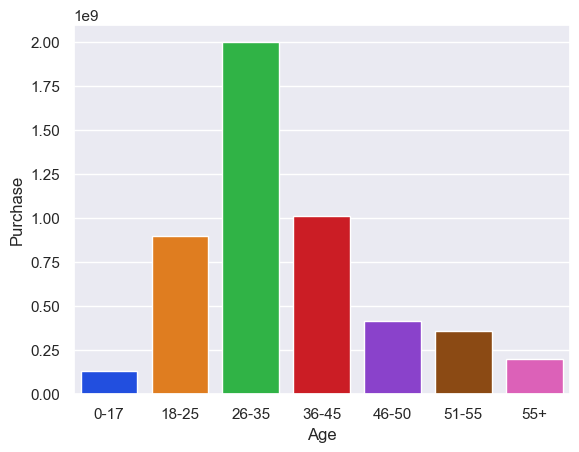

In [63]:
age_df = df.groupby('Age').agg({'Purchase':'sum'})
sns.barplot(data = age_df, x= "Age", y= 'Purchase', palette= 'bright')

**Unique products purchased by each age group**

<Axes: title={'center': 'Unique Products Per Age Group'}, xlabel='Age'>

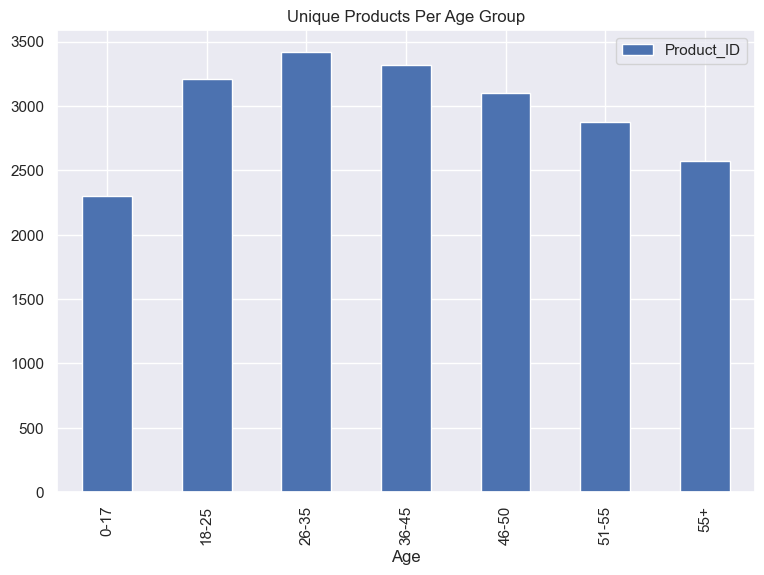

In [64]:
product_df = df.groupby('Age').agg({'Product_ID':'nunique'})
product_df.plot.bar(y='Product_ID', title = 'Unique Products Per Age Group', figsize = (9,6))

<Axes: xlabel='Age', ylabel='count'>

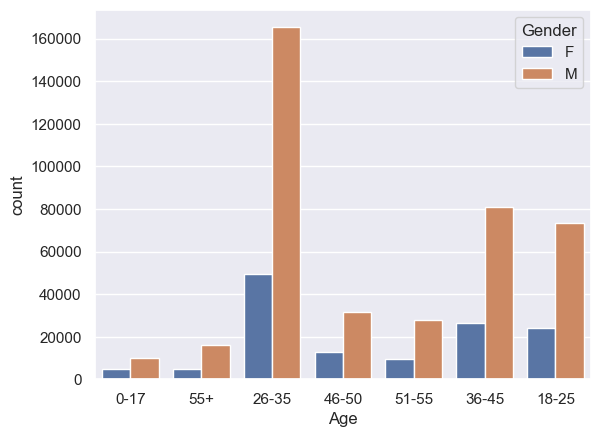

In [65]:
sns.countplot(data= df, x='Age', hue='Gender')

<Axes: title={'center': 'Distribution Of Married People per Age Group'}, ylabel='Age'>

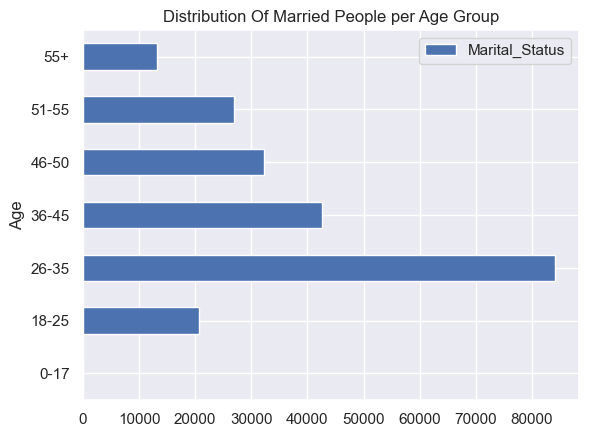

In [66]:
df.groupby('Age').agg({'Marital_Status':'sum'}).plot.barh(y='Marital_Status', title='Distribution Of Married People per Age Group')

<Axes: xlabel='Gender', ylabel='count'>

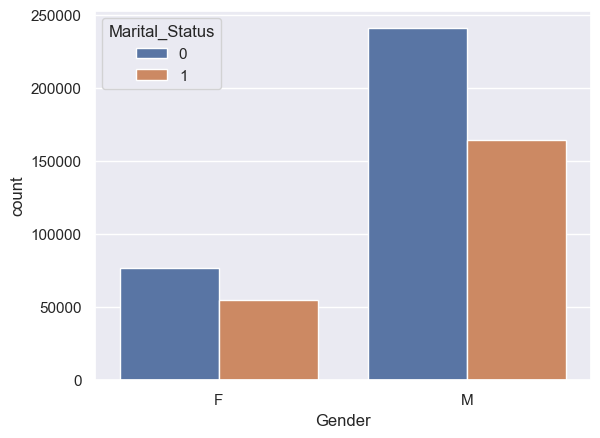

In [67]:
sns.countplot(data= df, x='Gender', hue='Marital_Status')

<Axes: xlabel='City_Category', ylabel='count'>

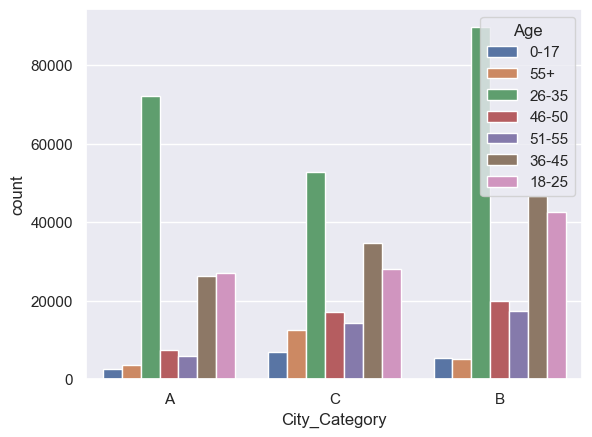

In [68]:
sns.countplot(data= df , x= 'City_Category', hue= 'Age', orient= 'y')

<Axes: title={'center': 'Distribution of Users across Cities'}, ylabel='City_Category'>

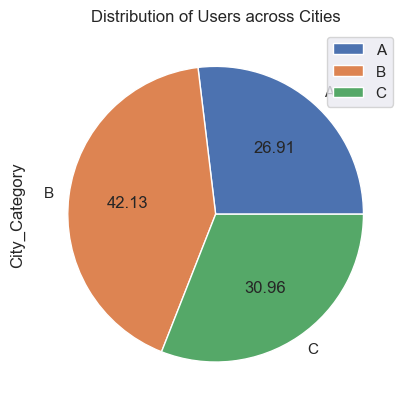

In [69]:
df.groupby('City_Category').agg({'City_Category':'count'}).plot.pie(y= 'City_Category', autopct = '%.2f', title = 'Distribution of Users across Cities')

<Axes: title={'center': 'Total purchases made across city types'}, xlabel='City_Category'>

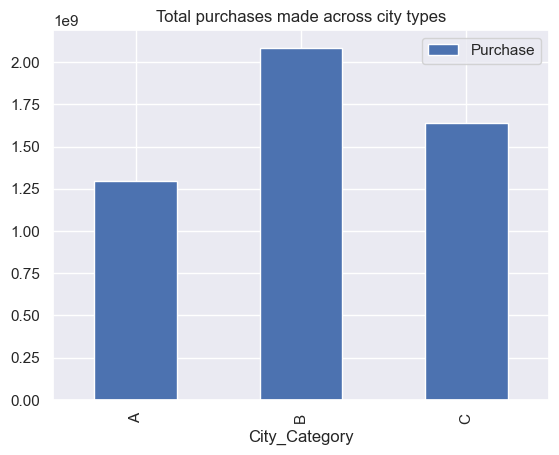

In [70]:
df.groupby('City_Category').agg({'Purchase':'sum'}).plot.bar(y='Purchase', title = 'Total purchases made across city types')

<Axes: title={'center': 'Average purchases made across city types'}, xlabel='City_Category'>

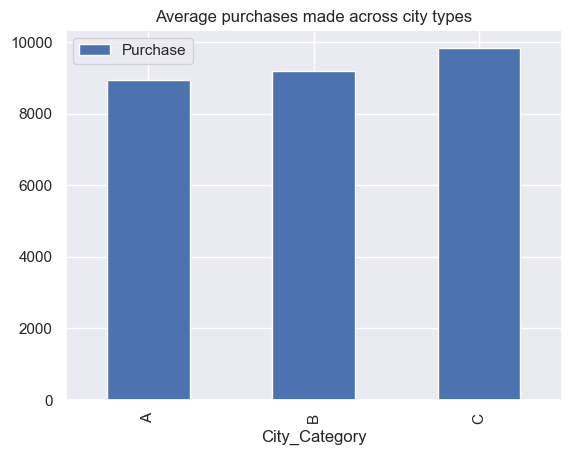

In [71]:
df.groupby('City_Category').agg({'Purchase':'mean'}).plot.bar(y='Purchase',  title = 'Average purchases made across city types')

<Axes: xlabel='count', ylabel='City_Category'>

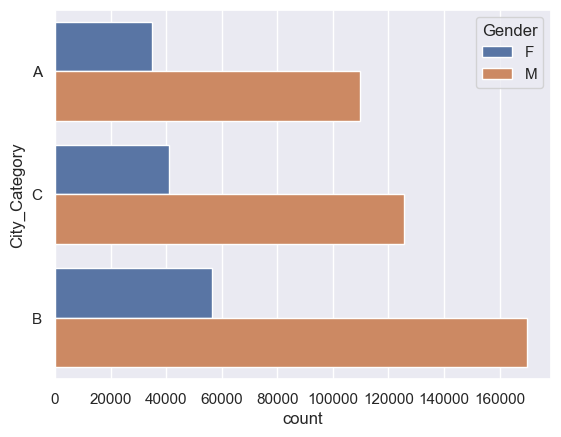

In [72]:
sns.countplot(data = df, y= 'City_Category', hue= 'Gender')

<Axes: xlabel='count', ylabel='City_Category'>

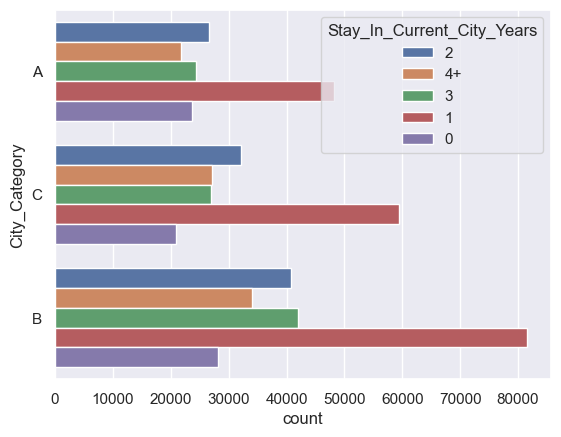

In [73]:
sns.countplot(data = df, y= 'City_Category', hue= 'Stay_In_Current_City_Years')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

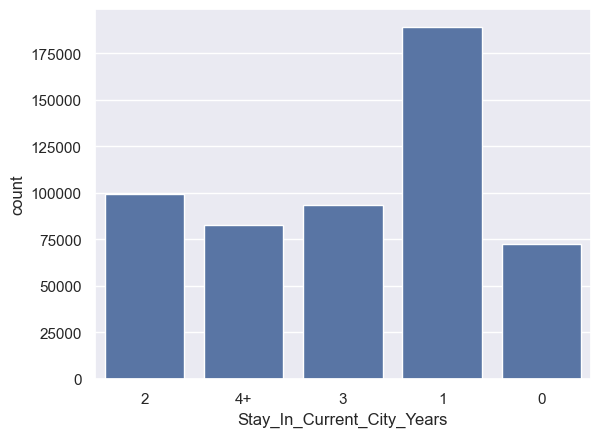

In [74]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: ylabel='Stay_In_Current_City_Years'>

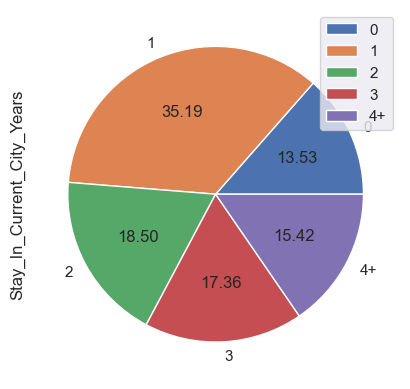

In [75]:
df.groupby('Stay_In_Current_City_Years').agg({'Stay_In_Current_City_Years':'count'}).plot.pie(y= 'Stay_In_Current_City_Years', autopct = '%.2f')

<Axes: xlabel='City_Category', ylabel='count'>

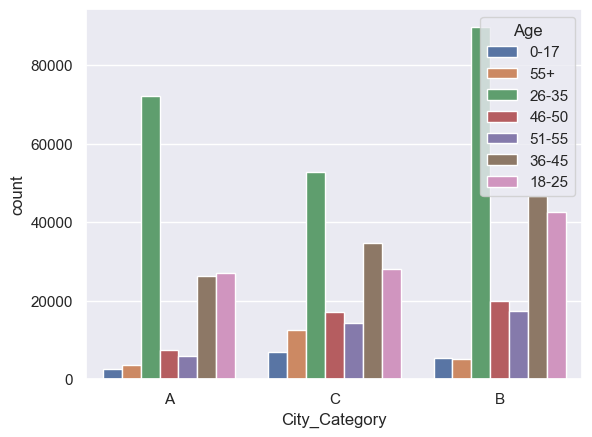

In [76]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

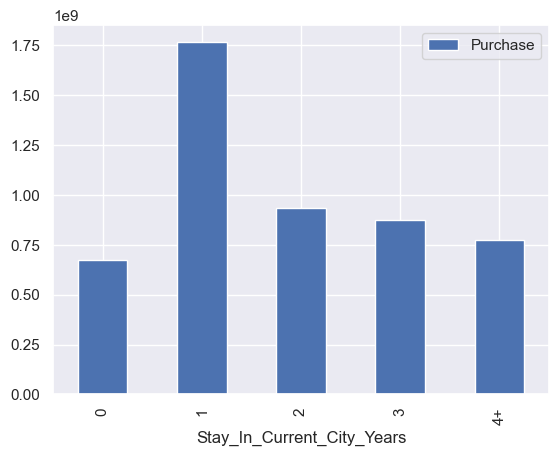

In [77]:
df.groupby('Stay_In_Current_City_Years').agg({'Purchase':'sum'}).plot.bar(y='Purchase')

<Axes: xlabel='count', ylabel='Occupation'>

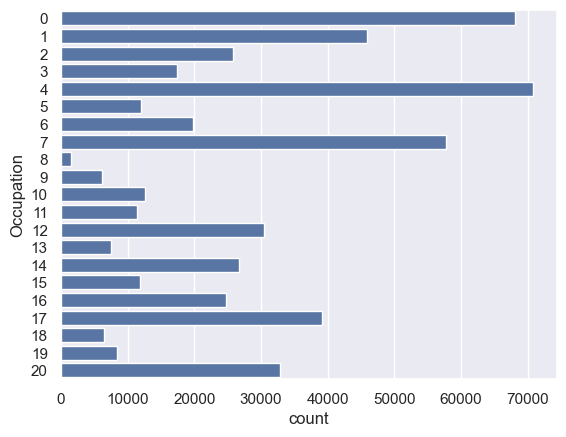

In [78]:
sns.countplot(data= df, y= 'Occupation')

<Axes: xlabel='Occupation'>

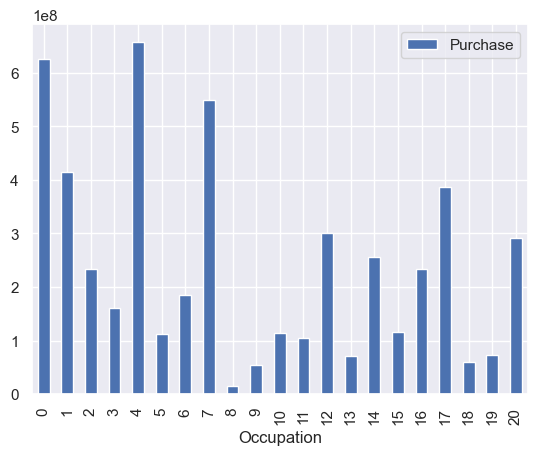

In [79]:
df.groupby('Occupation').agg({'Purchase':'sum'}).plot.bar()

<Axes: xlabel='Occupation'>

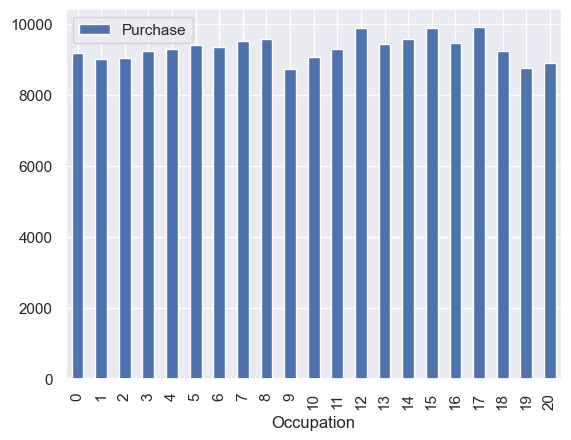

In [80]:
df.groupby('Occupation').agg({'Purchase':'mean'}).plot.bar()

<Axes: xlabel='Occupation', ylabel='count'>

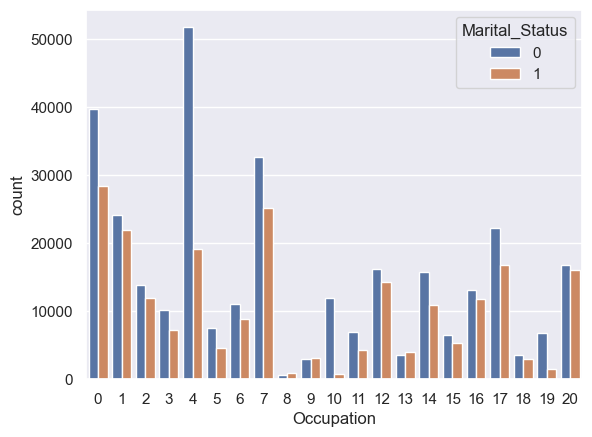

In [81]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

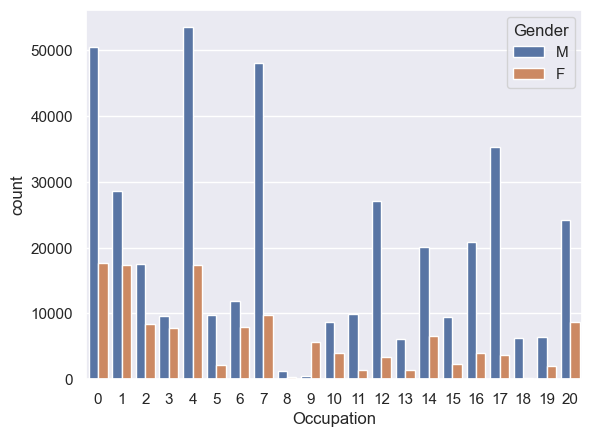

In [82]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

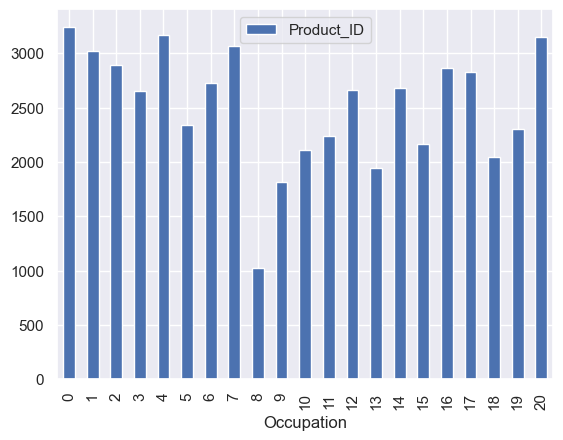

In [83]:
df.groupby('Occupation').agg({'Product_ID':'nunique'}).plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

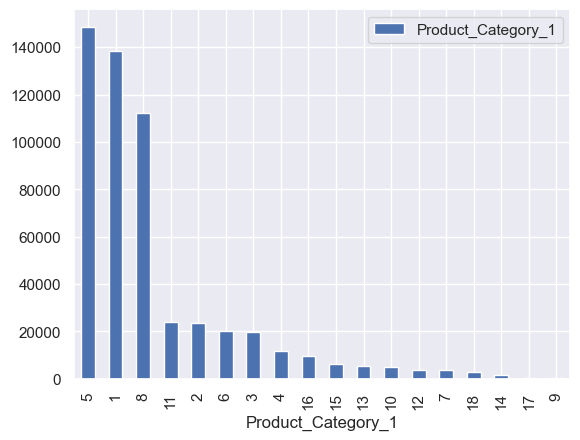

In [84]:
df.groupby('Product_Category_1').agg({'Product_Category_1':'count'}).nlargest(18, columns='Product_Category_1').plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

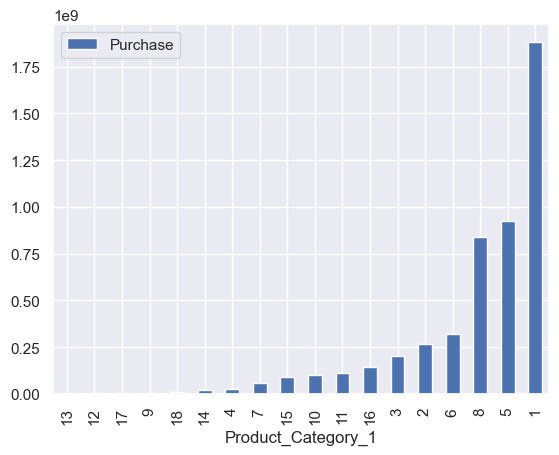

In [85]:
df.groupby('Product_Category_1').agg({'Purchase':'sum'}).sort_values(by= 'Purchase').plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

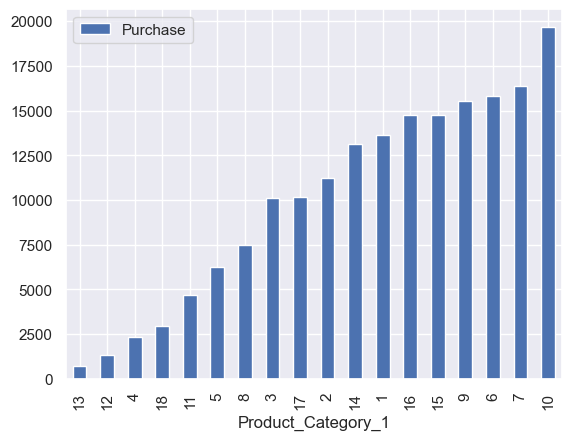

In [86]:
df.groupby('Product_Category_1').agg({'Purchase':'mean'}).sort_values(by= 'Purchase').plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

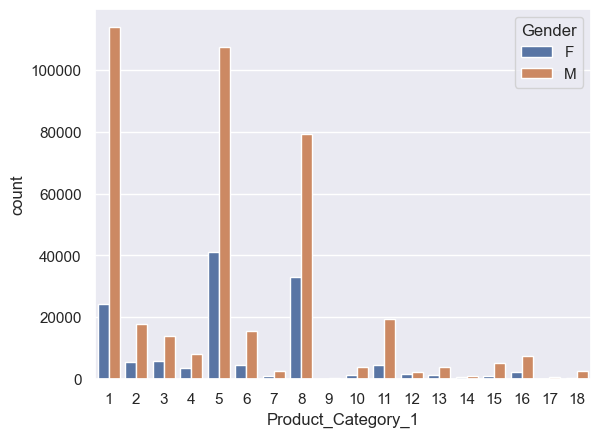

In [87]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

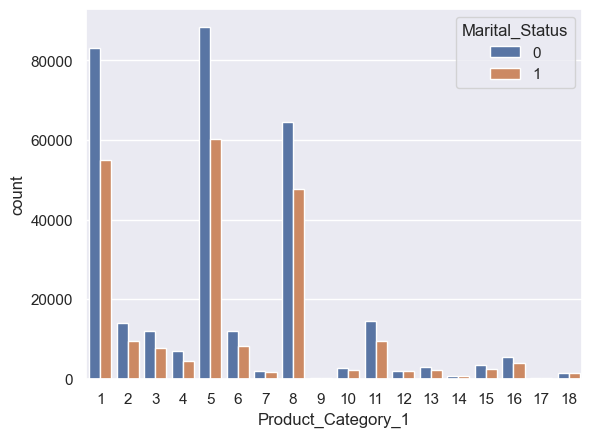

In [88]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)